# Human Activity 데이터 PCA
---
- 데이터를 읽고 column을 300개로 축소 (PCA)
- random Forest 모델로 분류
- 최종결과 :
    - 테스트 데이터의 정확도
    - Confusion Matrix 표시

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [3]:
human = pd.read_csv("./HumanActivityRecognition/train.csv")
human.shape

(7352, 563)

In [6]:
human.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## 데이터 분리

In [37]:
X = df.drop('Activity', axis=1)
y = df['Activity']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=2022)
X_train.shape, X_test.shape

((5881, 562), (1471, 562))

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
y_train = y_train.values

X_train.shape, X_test.shape

((5881, 562), (1471, 562))

In [40]:
X_train[:5]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
1637,0.272398,-0.018954,-0.101289,-0.996766,-0.969594,-0.970558,-0.996914,-0.969972,-0.973214,-0.940426,...,-0.835078,-0.982110,0.263147,-0.060925,-0.070449,0.069655,-0.841614,0.198333,0.063866,8
1598,0.225042,-0.091264,-0.369601,-0.127196,-0.328772,0.021112,-0.178100,-0.333001,0.029919,0.157339,...,-0.417367,-0.779397,-0.041260,0.061175,0.932661,-0.769766,-0.754385,0.250591,0.094568,7
6499,0.290766,-0.017149,-0.127670,-0.992640,-0.971171,-0.973492,-0.994076,-0.977772,-0.972931,-0.928286,...,-0.306215,-0.699566,-0.046789,0.340872,0.147331,-0.040510,-0.676184,0.125621,-0.214512,28
5643,0.246074,-0.010777,-0.115698,0.197557,0.066246,-0.218600,0.140271,0.099201,-0.269279,0.402617,...,-0.379756,-0.785885,0.731853,-0.751201,-0.967223,-0.191773,-0.831434,0.133044,-0.099053,26
3732,0.261458,-0.010132,-0.074156,-0.148370,0.126939,-0.271681,-0.207562,0.143107,-0.255920,0.232251,...,-0.130910,-0.417525,0.247034,-0.860520,0.944983,-0.344652,-0.762334,0.260065,0.046048,19


## PCA

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=300)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
X_train[:5]

array([[ 8.61385002e+00, -6.53244341e+00, -7.69754685e-01, ...,
         3.46731323e-02,  2.67412859e-02, -1.75439387e-02],
       [ 1.09136785e+01,  3.72390572e+00, -1.40183968e+00, ...,
         3.44407783e-02,  2.78151161e-02, -1.44680316e-02],
       [-1.11772106e+01, -3.74531659e+00,  7.32581981e-02, ...,
         1.02576723e-02, -8.37497761e-03,  1.62829480e-02],
       [-7.55240703e+00,  8.75614829e+00,  1.29602479e+00, ...,
        -1.15232276e-02,  3.21313480e-02,  7.13902852e-02],
       [-5.34877177e-01,  8.33382899e+00,  1.78879581e+00, ...,
        -1.52597952e-02, -4.69482605e-02,  7.89171138e-03]])

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5881, 300), (1471, 300), (5881,), (1471,))

## GridSearch

In [195]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':range(25,38),
    'max_depth':range(3,10),
}

clf = RandomForestClassifier(random_state=2022)
gs = GridSearchCV(clf, params, cv=3, verbose=3)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 91 candidates, totalling 273 fits
[CV 1/3] END ......max_depth=3, n_estimators=25;, score=0.816 total time=   0.2s
[CV 2/3] END ......max_depth=3, n_estimators=25;, score=0.795 total time=   0.2s
[CV 3/3] END ......max_depth=3, n_estimators=25;, score=0.812 total time=   0.2s
[CV 1/3] END ......max_depth=3, n_estimators=26;, score=0.815 total time=   0.2s
[CV 2/3] END ......max_depth=3, n_estimators=26;, score=0.797 total time=   0.2s
[CV 3/3] END ......max_depth=3, n_estimators=26;, score=0.812 total time=   0.2s
[CV 1/3] END ......max_depth=3, n_estimators=27;, score=0.811 total time=   0.2s
[CV 2/3] END ......max_depth=3, n_estimators=27;, score=0.798 total time=   0.2s
[CV 3/3] END ......max_depth=3, n_estimators=27;, score=0.811 total time=   0.2s
[CV 1/3] END ......max_depth=3, n_estimators=28;, score=0.812 total time=   0.2s
[CV 2/3] END ......max_depth=3, n_estimators=28;, score=0.792 total time=   0.2s
[CV 3/3] END ......max_depth=3, n_estimators=28

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2022),
             param_grid={'max_depth': range(3, 10),
                         'n_estimators': range(25, 38)},
             verbose=3)

In [196]:
gs.best_params_, gs.best_score_

({'max_depth': 9, 'n_estimators': 33}, 0.887093042214336)

In [248]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=31, max_depth=7, random_state=2022)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=31, random_state=2022)

In [249]:
clf.score(X_train, y_train)

0.9090290766876381

In [250]:
clf.score(X_test, y_test)

0.7416723317471108

## confusion matrix

In [212]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([0, 1, 0, 3, 3], dtype=int64)

In [213]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.7355540448674371
precision: 0.7280097664854397
recall: 0.7200639619441657


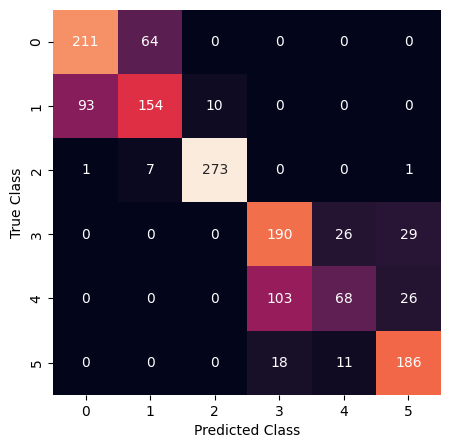

In [214]:
my.plot_confusion_matrix(y_test, y_pred)